<a href="https://colab.research.google.com/github/Ayodeleky/PHYS-4061/blob/main/PHYS_4061_L5UPDATED.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

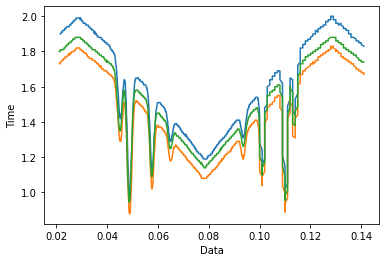

[0.0216 0.0217 0.0218 ... 1.83   1.83   1.83  ]


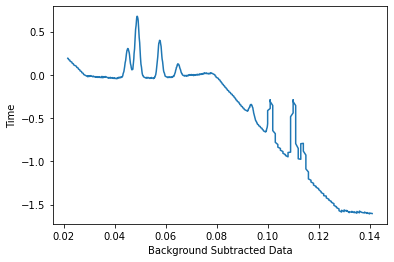

In [3]:
#PHYS 4061 Lab 5 Results
import numpy as np
import csv
import matplotlib.pyplot as plt
import scipy as sp
from scipy import stats

t_arr = []
data = []
data_2= []
data_sub = []
t_sub = []
t_1= []   
t_2 = []

with open("ex.1 lab 4.csv") as csv_file:
  csv_reader= csv.reader(csv_file,delimiter=",")
  line_count = 0
  for row in csv_reader:
    t_arr.append(float(row[0]))
    data.append(float(row[1]))


with open("ex.2 background signal.csv") as csv_file_bg:
  csv_reader_bg= csv.reader(csv_file_bg, delimiter=",")
  line_count=0
  for row in csv_reader_bg:
    t_2.append(float(row[0]))
    data_2.append(float(row[1]))

with open("ex.3 subtracting ch.1 and ch.2.csv") as csv_file_bg:
  csv_reader_bg= csv.reader(csv_file_bg, delimiter=",")
  line_count=0
  for row in csv_reader_bg:
    t_sub.append(float(row[0]))
    data_sub.append(float(row[1]))


plt.plot(t_arr,data)
plt.plot(t_2,data_2)
plt.plot(t_sub,data_sub, label= 'Exercise 1 Data')
plt.xlabel("Data")
plt.ylabel("Time")
plt.show()

ex_1 = np.append(t_arr,data)
print(ex_1)
#m= -5.15
#b=1.78
m= -15.625
b= 2.4290625

y = [(m*t) + b for t in t_arr]
subtract_data= []
subtract_data= np.subtract(y,data)
plt.plot(t_arr,subtract_data)
plt.xlabel('Background Subtracted Data')
plt.ylabel('Time')
plt.show()



In [40]:
def Gauss(x,y0, a, x0, sigma):
    return y0+a * np.exp(-(x - x0)**2 / (2 * sigma**2))


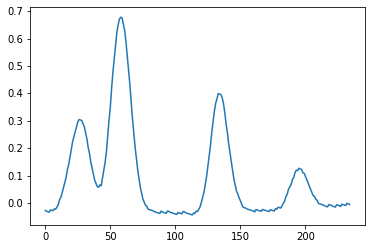

235
[-0.0271875 -0.0303125 -0.031875  -0.0334375 -0.025     -0.0265625
 -0.028125  -0.02125   -0.0228125 -0.014375  -0.0059375  0.0125
  0.0209375  0.0378125  0.05625    0.0746875  0.093125   0.1215625
  0.14       0.166875   0.1953125  0.22375    0.2421875  0.260625
  0.2790625  0.2959375  0.304375   0.3028125  0.30125    0.2896875
  0.278125   0.255      0.2334375  0.201875   0.1803125  0.14875
  0.1271875  0.1040625  0.0825     0.0709375  0.059375   0.0578125
  0.06625    0.063125   0.0915625]


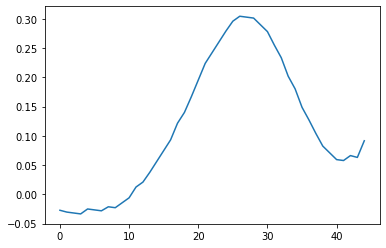

45


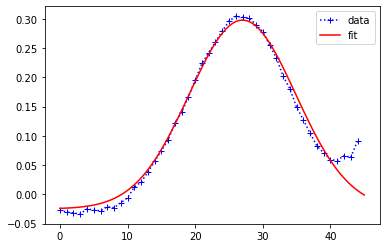

In [5]:
## Fitting Peak 1 to a Guassion:
from scipy.optimize import curve_fit

## Starting by finding the range for all the peaks
full_range= subtract_data[175:410]
plt.plot(full_range)
plt.show()
print(len(full_range))

## Finding the specific range for the 1st peak
peak_1= subtract_data[175:220]
plt.plot(peak_1)
print(peak_1)
plt.show()
print(len(peak_1))

#The number of data points for peak 1 is 45

#Now we can use the data from above to fit the data of peak 1 to a Guassian
x = np.arange(45)
xx = np.linspace(0, 45, 100)
y_peak = peak_1
mean = sum(x * y_peak) / sum(y_peak)
sigma = np.sqrt(sum(y_peak * (x - mean)**2) / sum(y_peak))


popt,pcov = curve_fit(Gauss, x, y_peak, p0=[5000,max(y_peak), mean, sigma])

plt.plot(x, y_peak, 'b+:', label='data')
plt.plot(xx, Gauss(xx, *popt), 'r-', label='Gaussian fit')
plt.legend()
plt.show()

50


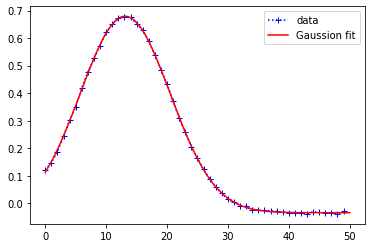

In [41]:
## Fitting peak 2 to Gaussion

## We start by finding the specific range for the 2nd peak
peak_2= subtract_data[220:270]
print(len(peak_2))

#The number of data points for peak 2 is 55

#Now we can use the data from above to fit the data of peak 2 to a Guassian
x_2 = np.arange(50)
xx_2 = np.linspace(0, 50, 500)
y2_peak = peak_2
# weighted arithmetic mean (corrected - check the section below)
mean_2 = sum(x_2 * y2_peak) / sum(y2_peak)
sigma_2 = np.sqrt(sum(y2_peak * (x_2 - mean_2)**2) / sum(y2_peak))


popt,pcov = curve_fit(Gauss, x_2, y2_peak, p0=[5000,max(y2_peak), mean_2, sigma_2])

plt.plot(x_2, y2_peak, 'b+:', label='data')
plt.plot(xx_2, Gauss(xx_2, *popt), 'r-', label='Gaussion fit')
plt.legend()
plt.show()

35


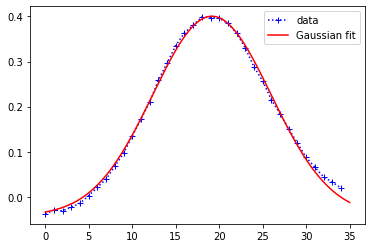

In [42]:

## Fitting peak 3 to Gaussion
## Finding the specific range for the 3rd peak
peak_3= subtract_data[290:325]
print(len(peak_3))

# There are 55 data points in peak 3
#Now we can use the data from above to fit the data of peak 2 to a Guassian
x = np.arange(35)
xx = np.linspace(0, 35, 500)
y_peak = peak_3
# weighted arithmetic mean (corrected - check the section below)
mean = sum(x * y_peak) / sum(y_peak)
sigma = np.sqrt(sum(y_peak * (x - mean)**2) / sum(y_peak))


popt,pcov = curve_fit(Gauss, x, y_peak, p0=[1000,max(y_peak), mean, sigma])

plt.plot(x, y_peak, 'b+:', label='data')
plt.plot(xx, Gauss(xx, *popt), 'r-', label='Gaussian fit')
plt.legend()
plt.show()




ValueError: ignored

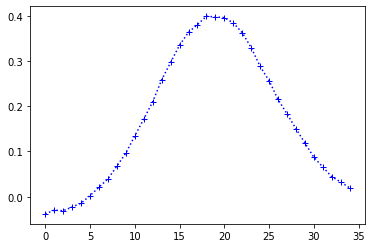

In [39]:
popt,pcov = curve_fit(Gauss, x, y_peak, p0=[1000,max(y_peak), mean, sigma])

plt.plot(x, y_peak, 'b+:', label='data')
plt.plot(xx, Gauss(xx, *popt), 'r-', label='Gaussian fit')


In [37]:
len(xx_4)

500

35


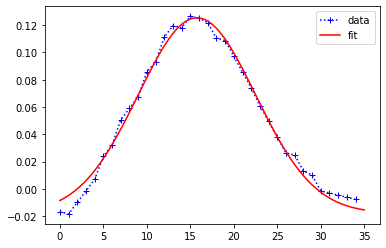

In [43]:
# Fitting peak 4 to Gaussian
## Finding the specific range for the 4th peak
peak_4= subtract_data[355:390]
print(len(peak_4))

#There are 35 data points in peak 4

#Now we can use the data from above to fit the data of peak 2 to a Guassian
x_4 = np.arange(35)
xx_4 = np.linspace(0, 35, 500)
y4_peak = peak_4
mean_4 = sum(x_4 * y4_peak) / sum(y4_peak)
sigma_4 = np.sqrt(sum(y4_peak * (x_4 - mean_4)**2) / sum(y4_peak))

# def Gauss(x42,y0, a, x0, sigma_4):
#     return y0+a * np.exp(-(x_4 - x0)**2 / (2 * sigma_4**2))


popt,pcov = curve_fit(Gauss, x_4, y4_peak, p0=[5000,max(y4_peak), mean_4, sigma_4])

plt.plot(x_4, y4_peak, 'b+:', label='data')
plt.plot(xx_4, Gauss(xx_4, *popt), 'r-', label='fit')
plt.legend()
plt.show()

[6.3843137178000005e-09, 6.326797378e-09, 6.2405228683e-09, 6.1830065285e-09, 6.1254901887e-09, 6.039215679e-09, 5.9816993392e-09, 5.8954248295e-09, 5.8379084897000005e-09, 5.780392149900001e-09, 5.7228758101000005e-09, 5.6366013004e-09, 5.579084960600001e-09, 5.4928104509000005e-09, 5.4352941111e-09, 5.3777777713000006e-09, 5.2915032616e-09, 5.2339869218e-09, 5.1764705820000004e-09, 5.1189542422e-09, 5.0326797325e-09, 4.9751633927e-09, 4.888888883000001e-09, 4.8313725432000005e-09, 4.7738562034e-09, 4.687581693700001e-09, 4.6300653539e-09, 4.5725490141e-09, 4.4862745044000006e-09, 4.4287581646e-09, 4.3712418248e-09, 4.2849673151000004e-09, 4.2274509753e-09, 4.1699346355e-09, 4.0836601257999994e-09, 4.026143786000001e-09, 3.9686274462e-09, 3.8823529365e-09, 3.8248365967000005e-09, 3.7673202569e-09, 3.6810457472000004e-09, 3.6235294074000004e-09, 3.5660130676e-09, 3.4797385579e-09, 3.4222222181000002e-09]


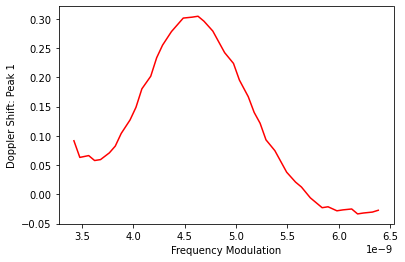

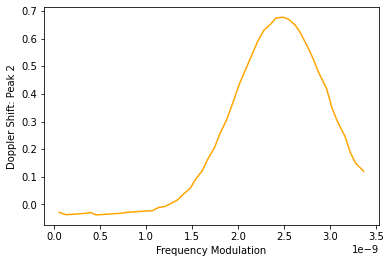

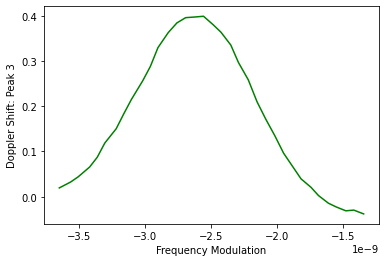

In [26]:
## Now we can plot each peak against the voltage modulation at the specific data points 
## For peak 1 we have:
import csv

volt_mod=[]

with open("ex.1 lab 4.csv") as csv_file:
  csv_reader= csv.reader(csv_file,delimiter=",")
  line_count = 0
  for row in csv_reader:
    t_arr.append(float(row[0]))
    data.append(float(row[1]))
    volt_mod.append(float(row[2]))

eta= 0.0000000287581699
volt_range_1= volt_mod[175:220]
volt_range_2=volt_mod[220:270]
volt_range_3= volt_mod[290:325]
volt_range_4= volt_mod[340:400]

eta_volt = [i * eta for i in volt_range_1]
print(eta_volt)
plt.plot(eta_volt,peak_1,'red')
plt.xlabel('Frequency Modulation')
plt.ylabel('Doppler Shift: Peak 1')
plt.show()
print('The ')

eta_volt_2 = [i * eta for i in volt_range_2]
plt.plot(eta_volt_2,peak_2,'orange')
plt.xlabel('Frequency Modulation')
plt.ylabel('Doppler Shift: Peak 2')
plt.show()

eta_volt_3 = [i * eta for i in volt_range_3]
plt.plot(eta_volt_3,peak_3,'green')
plt.xlabel('Frequency Modulation')
plt.ylabel('Doppler Shift: Peak 3')
plt.show()

eta_volt_4 = [i * eta for i in volt_range_4]
#plt.plot(eta_volt_4,peak_4,'purple')
#plt.xlabel('Frequency Modulation')
#plt.ylabel('Doppler Shift: Peak 4')
#plt.show()

In [34]:
from math import log, sqrt



c= 2.9*10**8
k= 1.380649 *10**-23
m_Rb=1.4192261*10**-25
temp= 293.15
ln= 2*log(2)

f_0= max(peak_1)
doppler_shift= (2*f_0/c)*sqrt((ln)*(k*temp/m_Rb))
print('The doppler shift for peak 1 is:', doppler_shift)

f_2= max(peak_2)
doppler_shift_2= (2*f_2/c)*sqrt((ln)*(k*temp/m_Rb))
print('The doppler shift for peak 2 is:', doppler_shift_2)

f_3= max(peak_3)

doppler_shift_3= (2*f_3/c)*sqrt((ln)*(k*temp/m_Rb))
print('The doppler shift for peak 3 is:', doppler_shift_3)

f_4= max(peak_4)
doppler_shift_4= (2*f_4/c)*sqrt((ln)*(k*temp/m_Rb))
print('The doppler shift for peak 4 is:', doppler_shift_4)


0.3043750000000003
The doppler shift for peak 1 is: 4.173779489958946e-07
0.6775625
The doppler shift for peak 2 is: 9.291158819434268e-07
0.3990625000000003
The doppler shift for peak 3 is: 5.472193438067324e-07
0.12656250000000013
The doppler shift for peak 4 is: 1.7355037920260505e-07


Here we can see the Doppler shifted peak in the 1st graph (red) where the background subtracted data is plotted against the frequency modulation, (which was converted using volt_mod/FSR=eta).
In comparison we see the original graph for the background subtracted data against the voltage modulation.
We can see from both graphs that the Doppler shifted graph does experience a shift towards the right hand side.

In [49]:
## Peak 2 is our largest absorption feature, hence we will use peak 2 to determine the number density of Rubidum atoms
from math import log, log10, exp, e, pow, sqrt
I_0= 100
I_L= 0.01
L= 0.07
cross_sec= 1.4*(10**-16)
diff= log(I_L/I_0)
num_dens= diff/(cross_sec*L)
print("The numer density of Rubidium atoms is:",num_dens)

#Now we will use the ideal gas law to calculate the pressure of rubidium
R= 8.31446261815324
Vol=0.38808
temp= 293.15
Pressure= (num_dens*R*temp)/Vol
print('The pressure of Rubidium inside the cell is calculated to be:',Pressure)


The numer density of Rubidium atoms is: -9.398306502016512e+17
The pressure of Rubidium inside the cell is calculated to be: -5.902723311973525e+21


In [ ]:
#Determine hyperfine splitting of the 5S1/2 states for both Rb(85) and Rb(87) and compare to accepted values

#The accepted values for the hyperfine splitting of the 5 1/2 states are given as:
## Rb 87 - 3035.73 MHz
## Rb 85 - 6834.68 MHz

## Peak 1 = Rb 85
## Peak 2 = Rb 87